"""
本文件功能说明：
- 初始数据探索：对YouTube Top Channel Videos数据集进行初步探索
- 数据质量检查：检查缺失值、异常值和数据类型
- 基础统计分析：计算基本统计指标，了解数据分布
- 数据清洗：处理缺失值和异常值
"""

## Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print('Libraries imported successfully!')

Libraries imported successfully!


In [2]:
# Load the main dataset
file_path = 'youtube_video.csv'
df = pd.read_csv(file_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Shape: (155669, 9)

Column names and types:
video_id          object
title             object
channel_name      object
channel_id        object
view_count         int64
like_count         int64
comment_count      int64
published_date    object
thumbnail         object
dtype: object

First few rows:
      video_id                                              title          channel_name                channel_id  view_count  like_count  comment_count        published_date                                         thumbnail
0  QwtOeDR-N3g  Why do Human Feet Wash up on This Beach? | Fas...    Fascinating Horror  UCFXad0mx4WxY1fXdbvtg0CQ       33955        1817            119  2025-10-03T09:15:02Z  https://i.ytimg.com/vi/QwtOeDR-N3g/hqdefault.jpg
1  K0fw1uiSGE0  Range Rover SV (2025) - The King of the City, ...                CAR TV  UCs_gcVRMHEx5mVXfQ7icQTg       59659        1130             22  2025-10-08T09:10:46Z  https://i.ytimg.com/vi/K0fw1uiSGE0/hqdefault.

## Step 2: Data Preprocessing - Convert Date and Extract Year

In [3]:
# Convert published_date to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# Extract year from published_date
df['year'] = df['published_date'].dt.year

print(f"Date conversion completed!")
print(f"\nDate range:")
print(f"  Earliest: {df['published_date'].min()}")
print(f"  Latest: {df['published_date'].max()}")
print(f"\nYear range:")
print(f"  From: {df['year'].min()}")
print(f"  To: {df['year'].max()}")

Date conversion completed!

Date range:
  Earliest: 2006-11-06 11:22:08+00:00
  Latest: 2025-10-20 12:08:16+00:00

Year range:
  From: 2006
  To: 2025


## Step 3: Analyze Data Distribution by Year

In [4]:
# Get statistics by year
year_stats = df.groupby('year').agg({
    'video_id': 'count',
    'view_count': ['mean', 'median', 'sum', 'min', 'max'],
    'like_count': ['mean', 'sum'],
    'comment_count': ['mean', 'sum']
}).round(2)

# Flatten column names
year_stats.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in year_stats.columns]
year_stats = year_stats.rename(columns={'video_id_count': 'video_count'})

print("Year-wise Statistics:")
print(year_stats)
print(f"\nTotal videos in dataset: {len(df):,}")

Year-wise Statistics:
      video_count  view_count_mean  view_count_median  view_count_sum  view_count_min  view_count_max  like_count_mean  like_count_sum  comment_count_mean  comment_count_sum
year                                                                                                                                                                         
2006           10     7.314963e+05           660747.0         7314963          454506         1145296          3901.20           39012              147.60               1476
2007           11     5.517749e+08         78762093.0      6069523362          519101      3751827725       1383510.18        15218612            15541.27             170954
2008           15     5.893623e+06           610793.0        88404352            6676        57813574        119188.53         1787828             4036.40              60546
2009          103     4.117670e+07          5652057.0      4241199828            3556       540208705       

## Step 4: Create Yearly Datasets and Save to Folder

In [5]:
# Create a folder for yearly datasets
output_dir = 'datasets_by_year'
os.makedirs(output_dir, exist_ok=True)

print(f"Output directory created: {output_dir}")
print(f"\nProcessing datasets by year...\n")

# Dictionary to store yearly dataframes
yearly_dfs = {}
yearly_info = []

# Get unique years and sort them
unique_years = sorted(df['year'].unique())

for year in unique_years:
    # Filter data for current year
    year_df = df[df['year'] == year].copy()
    yearly_dfs[year] = year_df
    
    # Save to CSV
    filename = f'{output_dir}/youtube_videos_{year}.csv'
    year_df.to_csv(filename, index=False)
    
    # Store information
    info = {
        'year': year,
        'video_count': len(year_df),
        'total_views': year_df['view_count'].sum(),
        'avg_views': year_df['view_count'].mean(),
        'total_likes': year_df['like_count'].sum(),
        'avg_likes': year_df['like_count'].mean(),
        'total_comments': year_df['comment_count'].sum(),
        'avg_comments': year_df['comment_count'].mean(),
        'unique_channels': year_df['channel_id'].nunique(),
        'file_path': filename
    }
    yearly_info.append(info)
    
    print(f"Year {year}:")
    print(f"  - Videos: {len(year_df):,}")
    print(f"  - Total views: {year_df['view_count'].sum():,.0f}")
    print(f"  - Unique channels: {year_df['channel_id'].nunique():,}")
    print(f"  - File saved: {filename}")
    print()

print(f"All yearly datasets saved successfully!")

Output directory created: datasets_by_year

Processing datasets by year...

Year 2006:
  - Videos: 10
  - Total views: 7,314,963
  - Unique channels: 1
  - File saved: datasets_by_year/youtube_videos_2006.csv

Year 2007:
  - Videos: 11
  - Total views: 6,069,523,362
  - Unique channels: 3
  - File saved: datasets_by_year/youtube_videos_2007.csv

Year 2008:
  - Videos: 15
  - Total views: 88,404,352
  - Unique channels: 6
  - File saved: datasets_by_year/youtube_videos_2008.csv

Year 2009:
  - Videos: 103
  - Total views: 4,241,199,828
  - Unique channels: 28
  - File saved: datasets_by_year/youtube_videos_2009.csv

Year 2010:
  - Videos: 40
  - Total views: 1,553,170,157
  - Unique channels: 24
  - File saved: datasets_by_year/youtube_videos_2010.csv

Year 2011:
  - Videos: 108
  - Total views: 4,834,045,257
  - Unique channels: 41
  - File saved: datasets_by_year/youtube_videos_2011.csv

Year 2012:
  - Videos: 201
  - Total views: 1,739,634,828
  - Unique channels: 57
  - File saved: 

## Step 5: Create Summary Report

In [6]:
# Create summary dataframe
summary_df = pd.DataFrame(yearly_info)

print("Yearly Summary Report:")
print("="*100)
print(summary_df.to_string(index=False))
print("="*100)

# Key statistics
print(f"\nKey Statistics:")
print(f"  Total videos: {summary_df['video_count'].sum():,}")
print(f"  Year range: {summary_df['year'].min()}-{summary_df['year'].max()}")
print(f"  Year with most videos: {summary_df.loc[summary_df['video_count'].idxmax(), 'year']} ({summary_df['video_count'].max():,} videos)")
print(f"  Year with fewest videos: {summary_df.loc[summary_df['video_count'].idxmin(), 'year']} ({summary_df['video_count'].min():,} videos)")
print(f"  Average videos per year: {summary_df['video_count'].mean():.0f}")
print(f"  Total unique channels: {summary_df['unique_channels'].sum():,}")

Yearly Summary Report:
 year  video_count  total_views    avg_views  total_likes    avg_likes  total_comments  avg_comments  unique_channels                                file_path
 2006           10      7314963 7.314963e+05        39012 3.901200e+03            1476    147.600000                1 datasets_by_year/youtube_videos_2006.csv
 2007           11   6069523362 5.517749e+08     15218612 1.383510e+06          170954  15541.272727                3 datasets_by_year/youtube_videos_2007.csv
 2008           15     88404352 5.893623e+06      1787828 1.191885e+05           60546   4036.400000                6 datasets_by_year/youtube_videos_2008.csv
 2009          103   4241199828 4.117670e+07     27039797 2.625223e+05         1087953  10562.650485               28 datasets_by_year/youtube_videos_2009.csv
 2010           40   1553170157 3.882925e+07     10920198 2.730050e+05          429393  10734.825000               24 datasets_by_year/youtube_videos_2010.csv
 2011          108   48

## Step 6: Save Summary Report

In [7]:
# Save summary report
summary_file = f'{output_dir}/yearly_summary.csv'
summary_df.to_csv(summary_file, index=False)

# Also save as formatted text
summary_text_file = f'{output_dir}/yearly_summary_report.txt'
with open(summary_text_file, 'w') as f:
    f.write("YouTube Videos Data - Yearly Decomposition Report\n")
    f.write("="*80 + "\n\n")
    f.write(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
    f.write("Summary Statistics by Year:\n")
    f.write("-"*80 + "\n")
    f.write(summary_df.to_string(index=False))
    f.write("\n\n" + "="*80 + "\n")
    f.write("Key Findings:\n")
    f.write("-"*80 + "\n")
    f.write(f"Total videos: {summary_df['video_count'].sum():,}\n")
    f.write(f"Year range: {summary_df['year'].min()}-{summary_df['year'].max()}\n")
    f.write(f"Peak year (most videos): {summary_df.loc[summary_df['video_count'].idxmax(), 'year']} ({summary_df['video_count'].max():,})\n")
    f.write(f"Average videos per year: {summary_df['video_count'].mean():.0f}\n")
    f.write(f"Total unique channels: {summary_df['unique_channels'].sum():,}\n")

print(f"Summary report saved:")
print(f"  - CSV: {summary_file}")
print(f"  - Text: {summary_text_file}")

Summary report saved:
  - CSV: datasets_by_year/yearly_summary.csv
  - Text: datasets_by_year/yearly_summary_report.txt


## Step 7: Data Quality Check for Each Year

In [8]:
# Check data quality for each year
print("Data Quality Report by Year:")
print("="*80)

for year in unique_years:
    year_df = yearly_dfs[year]
    
    print(f"\nYear {year}:")
    print(f"  Missing values:")
    print(f"    - video_id: {year_df['video_id'].isna().sum()}")
    print(f"    - title: {year_df['title'].isna().sum()}")
    print(f"    - view_count: {year_df['view_count'].isna().sum()}")
    print(f"  Zero values:")
    print(f"    - view_count: {(year_df['view_count'] == 0).sum()}")
    print(f"    - like_count: {(year_df['like_count'] == 0).sum()}")
    print(f"    - comment_count: {(year_df['comment_count'] == 0).sum()}")
    print(f"  Data range:")
    print(f"    - View counts: {year_df['view_count'].min():,} to {year_df['view_count'].max():,}")
    print(f"    - Like counts: {year_df['like_count'].min():,} to {year_df['like_count'].max():,}")

Data Quality Report by Year:

Year 2006:
  Missing values:
    - video_id: 0
    - title: 0
    - view_count: 0
  Zero values:
    - view_count: 0
    - like_count: 0
    - comment_count: 0
  Data range:
    - View counts: 454,506 to 1,145,296
    - Like counts: 2,243 to 6,194

Year 2007:
  Missing values:
    - video_id: 0
    - title: 0
    - view_count: 0
  Zero values:
    - view_count: 0
    - like_count: 0
    - comment_count: 4
  Data range:
    - View counts: 519,101 to 3,751,827,725
    - Like counts: 4,221 to 9,058,218

Year 2008:
  Missing values:
    - video_id: 0
    - title: 0
    - view_count: 0
  Zero values:
    - view_count: 0
    - like_count: 0
    - comment_count: 2
  Data range:
    - View counts: 6,676 to 57,813,574
    - Like counts: 13 to 1,463,579

Year 2009:
  Missing values:
    - video_id: 0
    - title: 0
    - view_count: 0
  Zero values:
    - view_count: 0
    - like_count: 0
    - comment_count: 7
  Data range:
    - View counts: 3,556 to 540,208,705
 

## Step 8: Visualization - Videos Count by Year

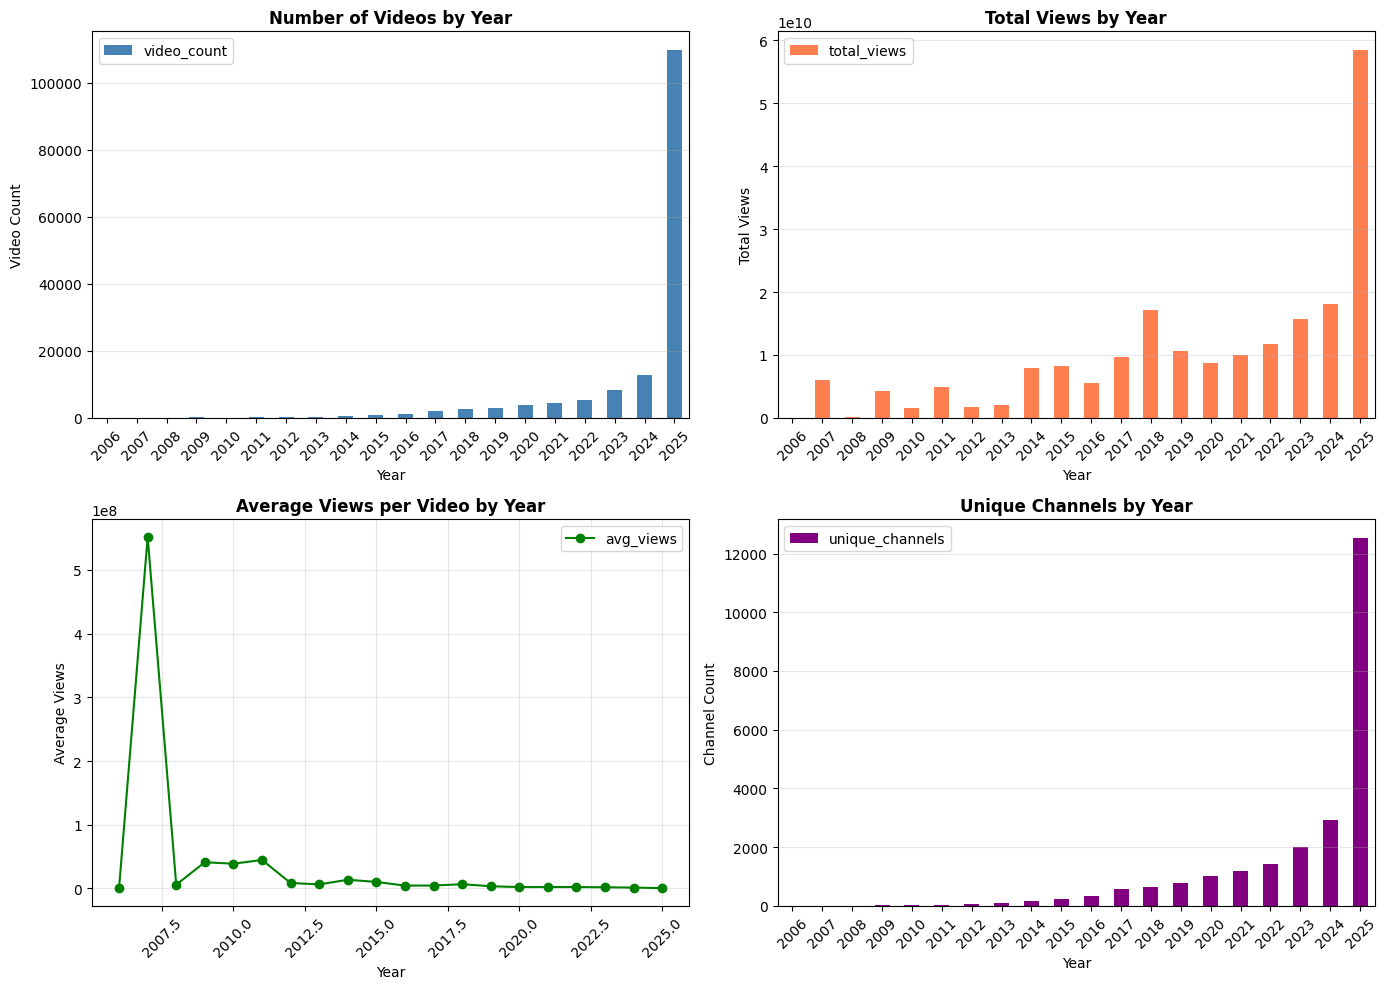

Visualization saved: datasets_by_year/yearly_statistics_visualization.png


In [9]:
import matplotlib.pyplot as plt

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Video count by year
ax1 = axes[0, 0]
summary_df.plot(x='year', y='video_count', kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Number of Videos by Year', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Video Count')
ax1.grid(axis='y', alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Plot 2: Total views by year
ax2 = axes[0, 1]
summary_df.plot(x='year', y='total_views', kind='bar', ax=ax2, color='coral')
ax2.set_title('Total Views by Year', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Views')
ax2.grid(axis='y', alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Plot 3: Average views per video by year
ax3 = axes[1, 0]
summary_df.plot(x='year', y='avg_views', kind='line', ax=ax3, color='green', marker='o')
ax3.set_title('Average Views per Video by Year', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Average Views')
ax3.grid(alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Plot 4: Unique channels by year
ax4 = axes[1, 1]
summary_df.plot(x='year', y='unique_channels', kind='bar', ax=ax4, color='purple')
ax4.set_title('Unique Channels by Year', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Channel Count')
ax4.grid(axis='y', alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig(f'{output_dir}/yearly_statistics_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Visualization saved: {output_dir}/yearly_statistics_visualization.png")

## Step 9: Create a Master Index File

In [10]:
# Create a master index file for easy reference
index_content = f"""YOUTUBE VIDEOS DATASET - YEARLY DECOMPOSITION INDEX
{'='*80}

Project Structure:
  Root Directory: datasets_by_year/
  
Files Generated:
  1. youtube_videos_YYYY.csv - Individual year datasets
  2. yearly_summary.csv - Summary statistics for all years
  3. yearly_summary_report.txt - Formatted text report
  4. yearly_statistics_visualization.png - Visual charts
  5. INDEX.txt - This file

Dataset Overview:
  Total Videos: {summary_df['video_count'].sum():,}
  Total Unique Channels: {summary_df['unique_channels'].sum():,}
  Date Range: {summary_df['year'].min()}-{summary_df['year'].max()}
  Total Views: {summary_df['total_views'].sum():,.0f}

Yearly Breakdown:
{'─'*80}
"""

for _, row in summary_df.iterrows():
    index_content += f"""
Year {int(row['year'])}:
  File: youtube_videos_{int(row['year'])}.csv
  Videos: {int(row['video_count']):,}
  Channels: {int(row['unique_channels']):,}
  Total Views: {row['total_views']:,.0f}
  Avg Views/Video: {row['avg_views']:,.0f}
"""

index_content += f"""\n{'='*80}
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

index_file = f'{output_dir}/INDEX.txt'
with open(index_file, 'w') as f:
    f.write(index_content)

print(f"Index file created: {index_file}")
print(f"\nContent preview:")
print(index_content)

Index file created: datasets_by_year/INDEX.txt

Content preview:
YOUTUBE VIDEOS DATASET - YEARLY DECOMPOSITION INDEX

Project Structure:
  Root Directory: datasets_by_year/

Files Generated:
  1. youtube_videos_YYYY.csv - Individual year datasets
  2. yearly_summary.csv - Summary statistics for all years
  3. yearly_summary_report.txt - Formatted text report
  4. yearly_statistics_visualization.png - Visual charts
  5. INDEX.txt - This file

Dataset Overview:
  Total Videos: 155,669
  Total Unique Channels: 24,045
  Date Range: 2006-2025
  Total Views: 202,593,126,580

Yearly Breakdown:
────────────────────────────────────────────────────────────────────────────────

Year 2006:
  File: youtube_videos_2006.csv
  Videos: 10
  Channels: 1
  Total Views: 7,314,963
  Avg Views/Video: 731,496

Year 2007:
  File: youtube_videos_2007.csv
  Videos: 11
  Channels: 3
  Total Views: 6,069,523,362
  Avg Views/Video: 551,774,851

Year 2008:
  File: youtube_videos_2008.csv
  Videos: 15
  Channels: 6
